setup

In [ ]:
# Install a pip comtradeapicall package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --upgrade comtradeapicall

# Install a pip pandas package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas

# Install a pip matplotlib package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import comtradeapicall


subscription_key = "b5856aa064474537a609f9c773a9441d"


Všechny importy 

In [11]:
# Generate commodity chunks explicitly as comma-separated strings
def make_cmd_chunks(start, end, size=20):
    all_codes = [f"{i:02d}" for i in range(start, end + 1)]
    return [','.join(all_codes[i:i + size]) for i in range(0, len(all_codes), size)]

commodity_chunks = make_cmd_chunks(1, 99, size=20)

dfs = []

for chunk in commodity_chunks:
    df = comtradeapicall.getFinalData(
        subscription_key,
        typeCode='C',
        freqCode='A',
        clCode='HS',
        period='2022',
        reporterCode='203',
        cmdCode=chunk,
        flowCode='M',
        partnerCode=None,
        partner2Code=None,
        customsCode=None,
        motCode=None,
        maxRecords=100000,
        format_output='JSON',
        aggregateBy=None,
        breakdownMode='classic',
        countOnly=None,
        includeDesc=True
    )
    dfs.append(df)

# Combine all results into one DataFrame
import pandas as pd
full_data = pd.concat(dfs, ignore_index=True)


shrnutí

In [13]:
# Total import value by partner country
imports_by_partner = full_data.groupby('partnerDesc')['cifvalue'].sum().sort_values(ascending=False)

print(imports_by_partner)

partnerDesc
World                     2.363200e+11
Germany                   4.682499e+10
China                     4.435673e+10
Poland                    1.893268e+10
Russian Federation        1.137495e+10
                              ...     
Wallis and Futuna Isds    3.240000e+02
Bouvet Island             3.180000e+02
Curaçao                   1.240000e+02
N. Mariana Isds           2.000000e+01
Kiribati                  1.400000e+01
Name: cifvalue, Length: 237, dtype: float64


mám rád koláče

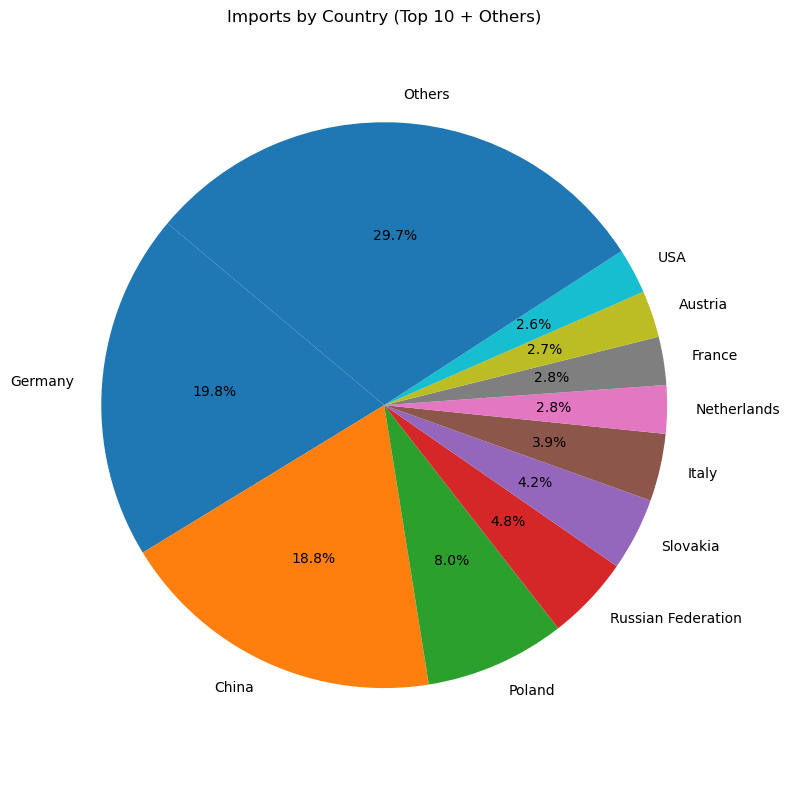

In [14]:
# Remove 'World' if present
if 'World' in imports_by_partner.index:
    imports_by_partner = imports_by_partner.drop('World')

if 'Areas, nes' in imports_by_partner.index:
    imports_by_partner = imports_by_partner.drop('Areas, nes')

# Sort descending
sorted_series = imports_by_partner.sort_values(ascending=False)

# Step 2: Top 10 countries
top_10 = sorted_series[:10]

# Step 3: Sum the rest as "Others"
others = sorted_series[10:].sum()

# Step 4: Append "Others" to the top 10
top_10_with_others = pd.concat([top_10, pd.Series({'Others': others})])

# Step 5: Plot
plt.figure(figsize=(8, 8))
plt.pie(top_10_with_others, labels=top_10_with_others.index, autopct='%1.1f%%', startangle=140)
plt.title('Imports by Country (Top 10 + Others)')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()
